In [1]:
import pandas as pd
df = pd.read_csv('_dataset/test.csv', names=['id', 'age', 'jobsts', 'own', 'cr', 'class'])
df

,id,age,jobsts,own,cr,class
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No
5,6,Middle,False,False,Fair,No
6,7,Middle,False,False,Good,No
7,8,Middle,True,True,Good,Yes
8,9,Middle,False,True,Excellent,Yes
9,10,Middle,False,True,Excellent,Yes


In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols = df.columns.to_list()
for i in range(len(cols)):
    df[cols[i]] = label_encoder.fit_transform(df[cols[i]])
df

,id,age,jobsts,own,cr,class
0,0,2,0,0,1,0
1,1,2,0,0,2,0
2,2,2,1,0,2,1
3,3,2,1,1,1,1
4,4,2,0,0,1,0
5,5,0,0,0,1,0
6,6,0,0,0,2,0
7,7,0,1,1,2,1
8,8,0,0,1,0,1
9,9,0,0,1,0,1


In [3]:
y = df['class']
x = df.drop(['class'], axis=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

'''dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(x, y)'''
predicitions = dtree.predict(x)
acc = accuracy_score(y, predicitions)

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\nentropy = 0.971\nsamples = 15\nvalue = [6, 9]'),
 Text(0.4, 0.5, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]')]

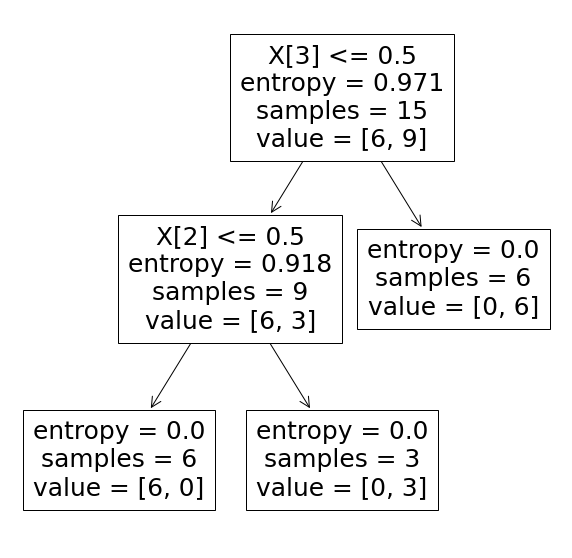

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,10)))
plot_tree(dtree)